## Notes

Edge weight = feasbility + actionability

where,

feasbility: statistical - how easy is it to get from data point A to data point B. Modelled by some distance measure (and density estimation)


actionability: something subjective - how easy is it for individual A to become individual B
(modelled by user specified constraints)


In [657]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [658]:
cols = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",]



In [659]:
data = pd.read_csv("diabetes.csv")

In [660]:
data = data[(data != '?').all(axis=1)].reset_index()

In [661]:
data

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0
764,764,2,122,70,27,0,36.8,0.340,27,0
765,765,5,121,72,23,112,26.2,0.245,30,0
766,766,1,126,60,0,0,30.1,0.349,47,1


## Design different use cases for explanations of this dataset 

Machine learning developer wanting to explore the relationship of glucose on diabetes outcome
Medic wanting to know why a particular male patient has been predicted as having diabetes
Female patient wanting to know how she could lower her chance of getting diabetes 

## Use clustering algorithm to obtain prototypes? 

In [662]:
X = data.drop(['Outcome'],axis="columns")
labels_true = data[['Outcome']].values.reshape(768)


In [663]:
db = DBSCAN(eps=80, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [664]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 2
Estimated number of noise points: 20
Homogeneity: 0.008
Completeness: 0.035
V-measure: 0.013
Adjusted Rand Index: 0.022
Adjusted Mutual Information: 0.010
Silhouette Coefficient: 0.333


In [665]:
### PCA projection for visualisation

In [666]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [667]:
X

array([[ 383.53474713,  -75.01210308],
       [ 382.68574066,  -81.65655908],
       [ 381.54340508,  -73.93170338],
       ...,
       [-381.55142741,   31.4137116 ],
       [-382.34617435,  -80.91563842],
       [-383.33383773,  -82.01103767]])

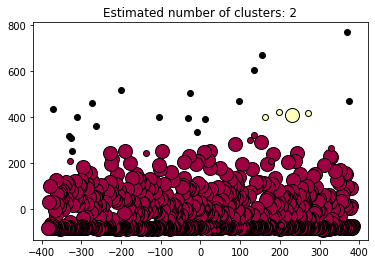

In [668]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [669]:
### Select two features for clustering

In [670]:
X = data[['BMI','Age']].values
labels_true = data[['Outcome']].values.reshape(768)

In [671]:
db = DBSCAN(eps=1, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [672]:
len(db.core_sample_indices_)

452

In [673]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 54
Estimated number of noise points: 252
Homogeneity: 0.156
Completeness: 0.038
V-measure: 0.061
Adjusted Rand Index: 0.034
Adjusted Mutual Information: 0.037
Silhouette Coefficient: -0.204


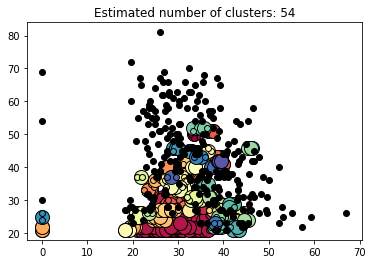

In [674]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Feasbility: A feature considered distance function 

### On Single Features:

#### Distance Metrics - The Case for breaking Metric Properties

A metric on a set $X$ is a function:
$$ d : X × X → R+ $$
For all $x, y, z$ in $X$, this function is required to satisfy the following conditions:
<ul>
    <li> 1. $ d(x, y) ≥ 0 $ </li>
    <li> 2. $d(x, y) = 0$  iff   $x = y$  </li>
    <li> 3. $ d(x, y) = d(y, x) $   </li>
    <li> 4. $ d(x, z) ≤ d(x, y) + d(y, z) $ </li>
</ul>
    
    
Why might these be violated when generating feasible counterfactual explanations?
<ul> 
    <li> 1. Non-negativity </li>
    <li> 2. identity of indiscernibles </li>
    <li> 3. Symmetry - Easy to increase a feature but impossible to decrease (i.e. age) </li>
    <li> 4. Triange - Easier to go "the long way round" rather than direct jump (i.e education level - impossible to go from kindergarten to PhD)</li>
    
Conjunction of 1 and 2 produce positive definiteness - important for convexity 

Extensions to Distance Metrics:
    <ul>
        <li> Pseudometrics satisfy all properties apart from 2 such that $d(x,x) = 0 $ and <it> possibly </it> $d(x,y)=0$. Similarly, metametrics satisfy all properties other than 2 such that $d(x,x)$ is not necessarily 0. </li> 
        <li> Quasimetrics obey by all properties other than 3. </li>
        <li> Semimetrics obey by all propoeties other than 4. </li>
        

#### Handling different types of feature

Features may be discrete or continuous. 

Popular distance measures on continuous data:
<ul>
    <li> Euclidean distance (L2 norm):
        $ d(x,y) = \sqrt{(x-y)^2} $ </li>
    <li> Manhattan distance (L1 norm): 
        $ d(x,y) = |x-y| $ </li>
    Both can be generalised by the Minkowski distance:
    <li> Minkowski distance:
        $d(x,y) = (|x-y|^p)^\frac{1}{p} $ </li>
    which, in the limit as $p -> \inf$ gives the Chebyshev metric
    <li> Chebyshev distance:
        $d(x,y) = max(x_{i},y_{i}$ </li> </ul>

L norms each have desirable characteristics when applied as similarity measures on continuous features due to the metric space implicity defined by numerical features. When the objects are defined by a set of numerical attributes, there are natural definitions of distance based on geometric analogies. However, in the case of categorical data, there is a lack of metric space and there is no single ordering for the categorical values. For example consider how to define distance between different occupations. By defining a metric space over discrete features we implictly encode a specific set of assumptions. Distance measures applied to categorical features include: 

<ul>
        <li> One-hot encoding of categorical variables to treat as a binary (numerical) variable </li>
    <li> Value Difference Metric (uses probabilities over features) </li>
    
</ul>

How to compute similarity between data points characterised by heterogenous features? 

<ul> 
    <li> Current Approaches: literature </li>
    <li> Naive Approach: Could one hot encode categorical and then consider different distance measures for each feature? We may wish to use Euclidean distance for age and Minkowski distance for all enccoded features representing occupationn <li>
    <li> Better approaches?
        <ul>
            <li> Heterogeneous Euclidean-Overlap Metric: if discrete, returns 0 if same class, 1 otherwise. If continous, Euclidean distance  </li>
            <li> Heterogeneous Value Difference Metric (HVDM): alternative approach that uses a different algorithm for discrete and continous data.   </li>
            <li> 
        </ul>
    </li>
</ul>

How do we take into acount the dependency between features - is a woman who is 45 and pregnant more similar to a 25 year old who is also pregnant or to a 45 year old woman who is not pregnant? 


#### Feasability and density 

Should similarity take into account the density of the experimental data? Is a data point more similar to another if there are lots of similar datapoints in that area? 
How does this work in higher dimensions 

### Naive implementation - one distance measure for discrete features and one for Euclidean 

### Select subset of 50 points from dataset

In [675]:
subset_data = data.sample(n=50)
subset_data

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
574,574,1,143,86,30,330,30.1,0.892,23,0
504,504,3,96,78,39,0,37.3,0.238,40,0
22,22,7,196,90,0,0,39.8,0.451,41,1
381,381,0,105,68,22,0,20.0,0.236,22,0
491,491,2,89,90,30,0,33.5,0.292,42,0
31,31,3,158,76,36,245,31.6,0.851,28,1
347,347,3,116,0,0,0,23.5,0.187,23,0
430,430,2,99,0,0,0,22.2,0.108,23,0
754,754,8,154,78,32,0,32.4,0.443,45,1
665,665,1,112,80,45,132,34.8,0.217,24,0


In [676]:
X = subset_data.drop(['Outcome','index'],axis="columns").values
y = subset_data[['Outcome']].values